In [ ]:
import colorsys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

(512, 384, 3)


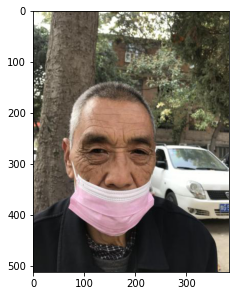

In [ ]:
image = plt.imread("old3.jpg")
print(image.shape)
fig, ax = plt.subplots(constrained_layout = True)
#constrained_layout : figsize에 입력한 크기와 입력한 figure의 이미지의 크기를 최대한 맞추는 옵션
ax.imshow(image)
plt.show()

0.38477973688661665


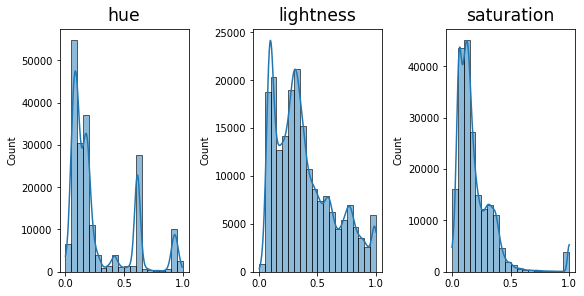

In [ ]:
#이미지를 rgb에서 hls 값으로 변환하고 분포를 히스토그램으로 확인

img_hls = np.array([colorsys.rgb_to_hls(*c) for c in (image/255).reshape((384*512, 3))]).T
print(img_hls[1].mean())
fig, axs = plt.subplots(ncols=3, figsize=(8, 4), constrained_layout=True)

#enumerate는 index를 함께 반환한다. 
for i, (title, ax) in enumerate(zip(["hue", "lightness", "saturation"], axs)):
    sns.histplot(img_hls[i], kde=True, bins=np.linspace(0, 1, 21), ax=ax)
    ax.set_title(title, fontsize="xx-large", pad=8)

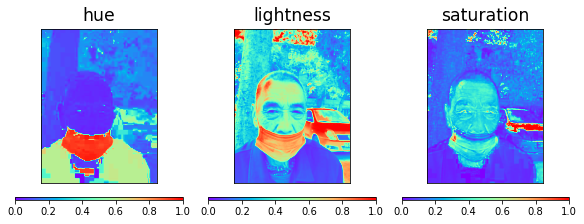

In [ ]:
#주어진 사진에서 HLS의 heatmap 확인

fig, axs = plt.subplots(ncols=3, figsize=(8, 3), constrained_layout=True)

for i, (title, ax) in enumerate(zip(["hue", "lightness", "saturation"], axs)):
    vmax = 1 if i == 0 else 1
    im = ax.imshow(img_hls[i].reshape(512, 384), cmap="rainbow", vmin=0, vmax=vmax)
    plt.colorbar(im, orientation="horizontal", ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize="xx-large", pad=8)

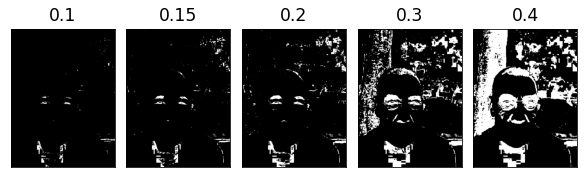

In [ ]:
#내가 HLS 값을 기준으로 선택한 영역을 흰색으로 표시 (나머지 검은색)

img_hls_face = deepcopy(img_hls)

fig, axs = plt.subplots(ncols=5, figsize=(8, 3), constrained_layout=True)

h_ths = [0.1, 0.15, 0.2, 0.3, 0.4]
for h_th, ax in zip(h_ths, axs):
    chk_face = np.where((img_hls[1] < h_th) & (img_hls[0] < 0.15), 1, 0)
    ax.imshow(chk_face.reshape(512, 384), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{h_th}", fontsize="xx-large", pad=8)

[[0.19444444 0.19444444 0.19444444 ... 0.10833333 0.10833333 0.10833333]
 [0.68627451 0.69019608 0.70980392 ... 0.7372549  0.7254902  0.70980392]
 [0.1875     0.18987342 0.2027027  ... 1.         1.         1.        ]]


[]

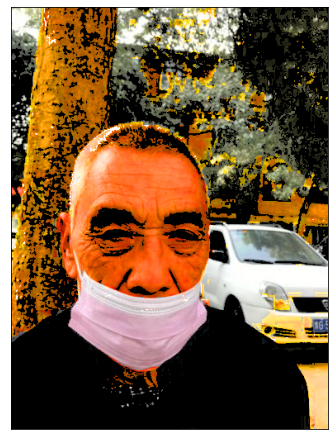

In [ ]:
#np.where는 인자로 넘긴 조건을 만족하는 값의 인덱스를 반환한다. rgb는 인덱스가 3차원이기에 1차원 인덱스만 뽑아주려고 [0]를 뒤에 붙인다. 

idx_skin = np.where((img_hls[0] < 0.15) & (img_hls[0] > 0.01))[0]
idx_black = np.where((img_hls[1] < 0.3) & (img_hls[2] < 0.2 ))[0]
idx_wrinkle = np.where((img_hls[1] < 0.3) & (img_hls[0] < 0.15 ))[0]

#피부를 인식하여 채도를 높여줌
for idx in idx_skin:
    img_hls_face[2, idx] = min(img_hls_face[2, idx]+0.6, 1)
#주름을 인식하여 밝기를 낮춤
for idx in idx_wrinkle :
    img_hls_face[0, idx] = max(img_hls_face[1, idx]-0.3, 0)
    img_hls_face[1, idx] = max(img_hls_face[1, idx]-0.3, 0)
    img_hls_face[2, idx] = max(img_hls_face[1, idx]-0.3, 0)
#머리카락을 인식하여 밝기를 낮춤
for idx in idx_black :
    img_hls_face[0, idx] = max(img_hls_face[1, idx]-0.3, 0)
    img_hls_face[1, idx] = max(img_hls_face[1, idx]-0.3, 0)
    img_hls_face[2, idx] = max(img_hls_face[1, idx]-0.3, 0)
print(img_hls_face)
img_rgb_tiger = np.array([colorsys.hls_to_rgb(*c) for c in img_hls_face.T])

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
ax.imshow(img_rgb_tiger.reshape(512, 384, 3))
ax.set_xticks([])
ax.set_yticks([])